In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

In [4]:
# API base URL
api_url = "https://www.healthit.gov/data/open-api"
source_url = "https://www.healthit.gov/data/open-api?source=AHA_2008-2015.csv"
# Define the path to the data directory
data_dir = Path("C:/Users/Sarah/SARAH_PROJECT_FOLDER/DA_Mod2_Wk4_Plots")
csv_file = data_dir / "ehr_data.csv"
df = pd.read_csv(csv_file)
print(df.head())

                              developer provider_type  program_year  \
0         3M Health Information Systems      hospital          2011   
1                            Allscripts      hospital          2011   
2              Aurora Health Care, Inc.      hospital          2011   
3  Beth Israel Deaconess Medical Center      hospital          2011   
4                 Boston Medical Center      hospital          2011   

   tot_provs_report_developer  tot_provs_report_2015_edition  \
0                           1                              0   
1                          19                              0   
2                           4                              0   
3                           1                              0   
4                           1                              0   

   tot_provs_report_2014_edition  tot_provs_report_2011_edition  \
0                              0                              1   
1                              0                      

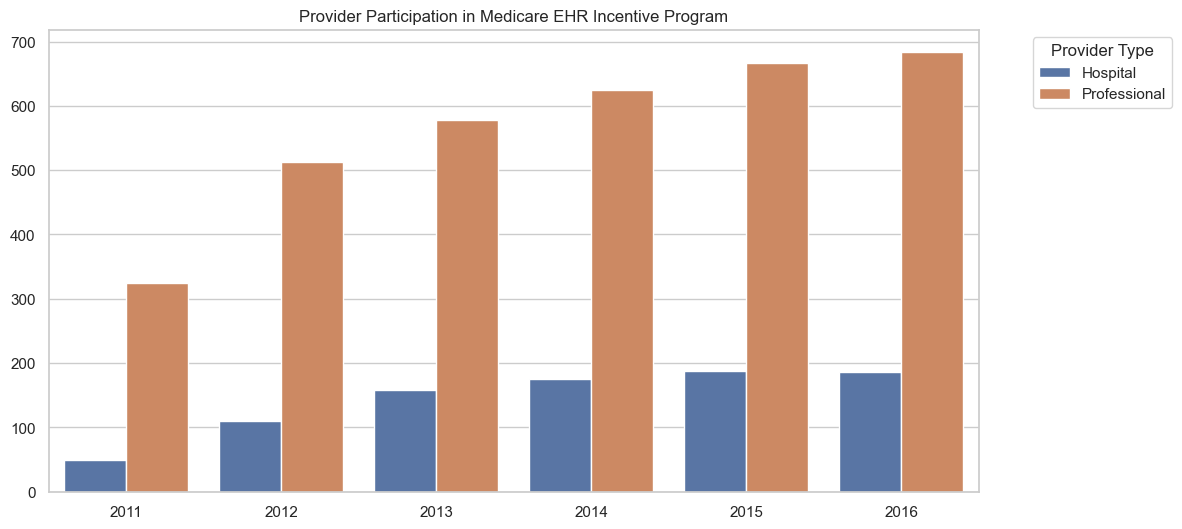

In [5]:
#Plot #1 Percentage of Providers Participating in the EHR Incentive Program
df_grouped = df.groupby(['program_year', 'provider_type']).size().reset_index(name='count')
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
df_grouped['provider_type'] = df_grouped['provider_type'].str.title()
sns.barplot(x='program_year', y='count', hue='provider_type', data=df_grouped)
plt.title('Provider Participation in Medicare EHR Incentive Program')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Provider Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('provider_count.png')
plt.show()

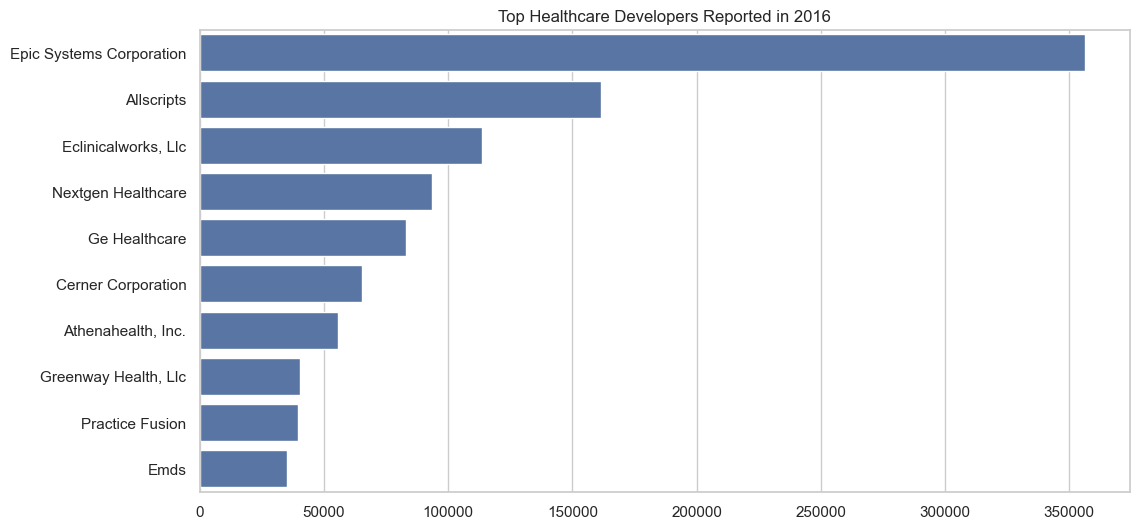

In [6]:
#Plot #2 Top 10 Developers of EHR Systems
df = pd.read_csv(data_dir / "ehr_data.csv")
df['developer'] = df['developer'].str.title()
df['tot_provs_report_developer'] = df.groupby('developer')['tot_provs_report_developer'].transform('sum')
df = df.drop_duplicates(subset=['developer'])
df = df.sort_values(by='tot_provs_report_developer', ascending=False)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x='tot_provs_report_developer', y='developer', data=df.head(10))
plt.title('Top Healthcare Developers Reported in 2016')
plt.xlabel('')
plt.ylabel('')
plt.savefig('top_10_developers.png')
plt.show()

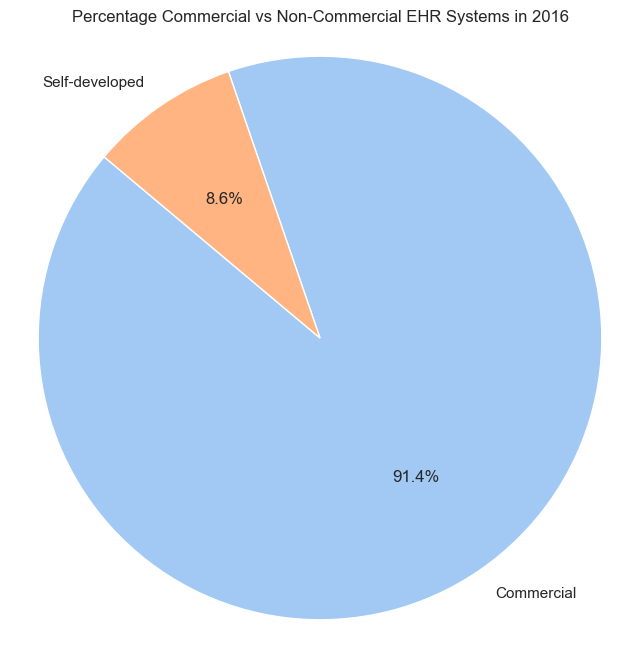

In [7]:
#Plot #3 Percentage of Commercial vs Non-Commercial EHR Systems in 2016
df = pd.read_csv(data_dir / "ehr_data.csv")
df_grouped = df.groupby(['product_type']).size().reset_index(name='count')
df_grouped['percentage'] = (df_grouped['count'] / df_grouped['count'].sum()) * 100
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:len(df_grouped['product_type'])]
plt.pie(df_grouped['percentage'], labels=df_grouped['product_type'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage Commercial vs Non-Commercial EHR Systems in 2016')
plt.axis('equal')
plt.savefig('commercial_vs_non_commercial.png')
plt.show()